In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [19]:
data = pd.read_csv('sp500_modified.csv')

#normalizing thr close price
minmaxScaler = MinMaxScaler()
data.Close = minmaxScaler.fit_transform(data.Close)
data.head(2)

/home/satishj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/satishj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


,Date,Close,Days
0,2000-01-01,0.519646,1
1,2000-01-02,0.482409,2


In [20]:
X = (np.arange(1,4172)).reshape(4171,1)
y = (data.Close).reshape(4171,1)  # we are apply reshape here because sklearn always takes column in the format (r,c)
# and not (r,)

X_train = X[:3000]
y_train = y[:3000]

X_test = X[3000:]
y_test = y[3000:]

clf = LinearRegression()
print X_train.shape,y_train.shape

clf.fit(X_train,y_train)

(3000, 1) (3000, 1)


/home/satishj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
predicted = clf.predict(X_test)

print("Root mean squared error: %.2f"
      % np.mean(np.sqrt((predicted - y_test) ** 2)))

Root mean squared error: 0.40


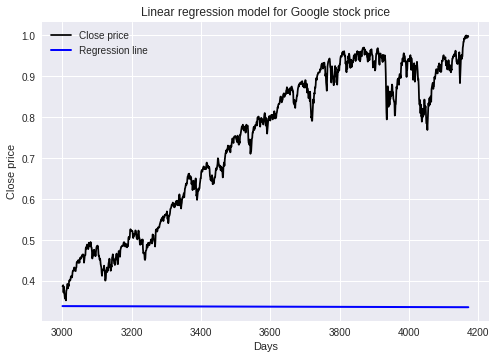

In [22]:
# Plot outputs
plt.plot(X_test,y_test,label = 'Close price',  color='black', )

plt.plot(X_test, predicted,label = 'Regression line', color='blue',
         linewidth=2)
plt.xlabel('Days')
plt.ylabel('Close price')

plt.title('Linear regression model for Google stock price')
plt.legend()
plt.show()